In [13]:
def ll(z0,*z123):
    z=z0
    for i in z123:
        z=1/(1/(z)+1/i)
    return z


In [14]:
ll(112, 10000)

110.75949367088609

In [15]:
ll(ll(100-753.13j,-136j)+126j , -136)

(1.495305211360009+10.842618341312871j)

In [16]:
f=11.3e6
w=2*3.14159*f

c=96e-12
xl=137.5
xl_antenna = -.0975*50 
r_antenna = .991*50  

cmosfet = 130e-9
xcmosfet =-1/(w*cmosfet)


xc=-1/(w*c)
print(xc)


zload = 1/(1/(xl_antenna*1j+r_antenna)+1/xc*1j)
zload+xl*1j

# zload = 1/(1/(zload)+ 1/xcmosfet*1j)
zload





-146.71375140527127


(47.24846166969324+11.463240627287252j)

In [17]:
f=10.12e6
w=2*3.14159*f

c=17e-12

xc=1/(2*3.1415*f*c)
l=xc/(2*3.14*f)
l*1e6

14.556714026263949

In [18]:
r=250
xc = -157j
xl = 157j

z= 1/(1/r+1/xc)+xl
44/(2*3.14*f)*1e6


0.6923289947382996

In [19]:
f=8.7e6
w=2*3.14159*f
ct = 17e-12
lm = 28e-6
zl = 1j*w*l
zc=-1j/(w*c)
print(f'{zl= }')
print(f'{zc= }')
zl+zc
xantenna = zc+zl

zl= 795.7233535892078j
zc= (-0-1076.099239516148j)


In [20]:
zc =-182.9j
zload = xantenna+250

1/(1/zc+1/zload)+287.5j

(30.17813689254546+160.52321241807385j)

In [21]:
import math
import numpy as np
from matplotlib import pyplot as plt 

Tuning 10.12Mhz

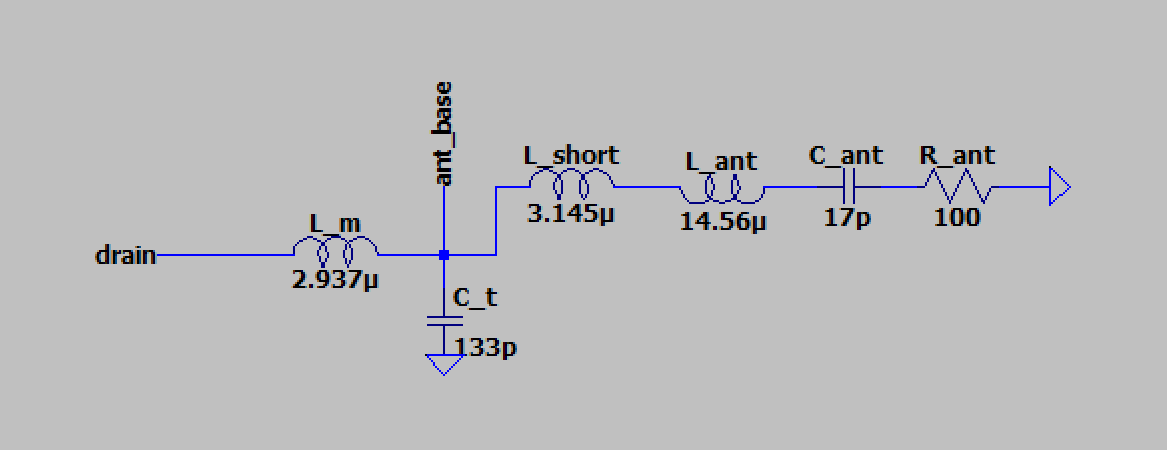

In [22]:
# f=10.12e6

# zantenna = 90+800j
# rmatch = 80

def tune_lmatch(f,xantenna:float,rantenna= 100, ct = 130e-12, lmatch = None):
    '''find optimal Lm from the above circuit
    returns: load impedence, Lm optimal'''
    zantenna= 1j*xantenna+rantenna

    w=2*3.14159*f
    # D=zantenna.real**2 +zantenna.imag**2
    # try:
    #     xt=D/(zantenna.imag + zantenna.real*(D/(zantenna.real*rmatch)-1)**(1/2))
        # ct_optimal =1/(w*xt)*1e12
        # print(f'{ct_optimal = } pF')
    # except: print("ct_optimal not found")

    l_short =  zantenna.imag/w
    # print(f'{l_short = } ')
    zct=-1j/(w*ct)
    zload = 1/(1/zantenna +1/zct )
    xlm = - zload.imag

    if lmatch is None: lmatch = xlm/w
    else: xlm=w*lmatch
    ztotal = 1/(1/zantenna +1/zct )+1j*xlm
    ztotal

    return ztotal,lmatch

10.272213052117399


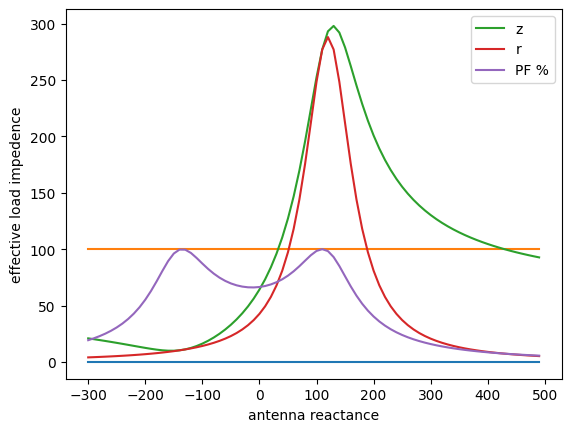

In [23]:
xantenna = np.arange(-300,500, 10)
f = 10.2012e6
w =2*3.14159*f
zlist=[]
xlist=[]
rlist=[]
for x in xantenna:
    ztotal,lmatch= tune_lmatch(f,x, ct = 130e-12,lmatch =1.025e-6 ,rantenna=50)
    zlist.append(abs(ztotal))
    xlist.append(ztotal.imag)
    rlist.append(ztotal.real)
    # print(f'x: {round(ztotal,2)}, lmatch: {round(lmatch*1e6,2)} uH (j{round(w*lmatch, 2)}), antenna:{round(x/w*1e6,2)}u ({x})')
ropt=rlist[np.argmin(np.abs(xlist))]
print(ropt)
pf = np.array(rlist)/np.array(zlist)*100
# plt.plot([xantenna[0], xantenna[-1]], [ropt,ropt])
plt.plot([xantenna[0], xantenna[-1]], [0,0])
plt.plot([xantenna[0], xantenna[-1]], [100,100])

plt.plot(xantenna, zlist, label = "z")
# plt.plot(xantenna, xlist, label = "x")
plt.plot(xantenna, rlist, label = "r")
plt.plot(xantenna, pf, label = "PF %")

plt.xlabel("antenna reactance")
plt.ylabel("effective load impedence")
plt.legend()
plt.show()



In [24]:

xlm = - zload.imag
lmatch = xlm/w

print(f'{lmatch*1e6= }')

wi = 2*3.14159 * f
zct=-1j/(wi*ct)
zlm = 1j*lmatch*wi

ztotal = 1/(1/zantenna +1/zct )+zlm
ztotal

lmatch*1e6= 4.374313400451438


NameError: name 'zantenna' is not defined

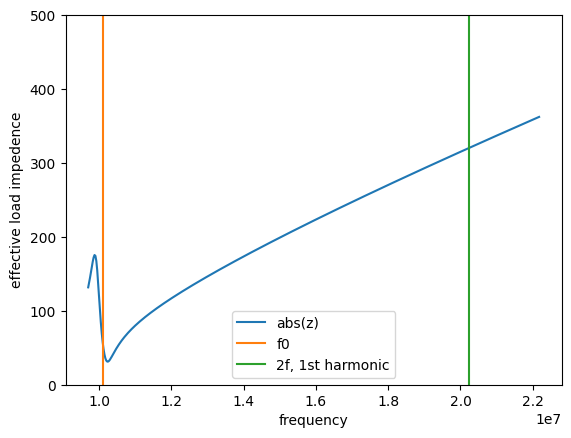

(49.90139667206079+0.406788121810024j)

In [25]:
import numpy as np
from matplotlib import pyplot as plt
f = 10.12e6
w=2*3.14159*f
xantenna = 260
rantenna = 100
ct = 130e-12
lmatch = 3e-6

#antenna model
l_short = xantenna/w
c_ant = 4.5e-12
xc=1/(w*c_ant)
l_res=xc/w
l_ant = l_res+l_short

fstart = 9.7e6
fstop = 22.2e6
n_points = 500
flist = np.arange(fstart,fstop, (fstop-fstart)/n_points )
zlist = []
xlist = []

for fi in flist:
    wi = 2*3.14159 * fi
    zantenna = 1j*wi*l_ant-1j/(c_ant*wi)+rantenna
    zct=-1j/(wi*ct)
    zlm = 1j*lmatch*wi
    
    ztotal = 1/(1/zantenna +1/zct )+zlm
    zlist.append(abs(ztotal))
    xlist.append(ztotal.imag)

# plt.loglog(flist, zlist)
plt.plot(flist, zlist,label = "abs(z)")
ylim = [000,500]
plt.ylim(ylim)
plt.plot([f, f], ylim, label = "f0")
plt.plot([2*f, 2*f], ylim ,label = "2f, 1st harmonic")

plt.xlabel("frequency")
plt.ylabel("effective load impedence")
plt.legend()
plt.show()

fi=f
wi = 2*3.14159 * fi
zantenna = 1j*wi*l_ant-1j/(c_ant*wi)+100
zct=-1j/(wi*ct)
zlm = 1j*lmatch*wi


ztotal = 1/(1/zantenna +1/zct )+zlm
ztotal

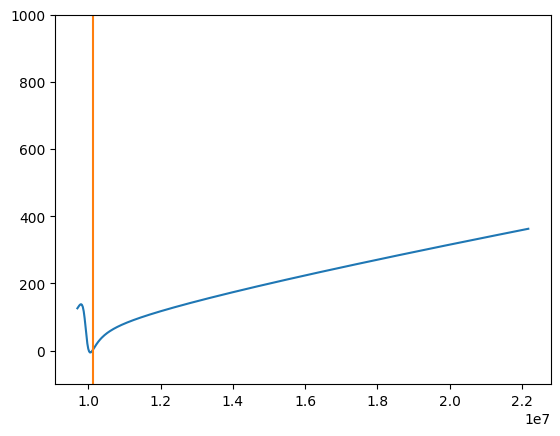

In [26]:
# plt.loglog(flist, zlist)
plt.plot(flist, xlist)
ylim = [-100,1000]
plt.ylim(ylim)
plt.plot([f, f], ylim)
# plt.plot([2*f, 2*f], ylim)

plt.show()

gate bias ciruit

In [27]:
v10k = [52.3,71]
v1k = [56.7, 68]
v1k11=[49,75]
v10011 = [56, 69]
## audio at 100hz 6v: 265ma
r=6/.265 

L = .002
z = 2*3.14*100* L
z

1.256

transformer model

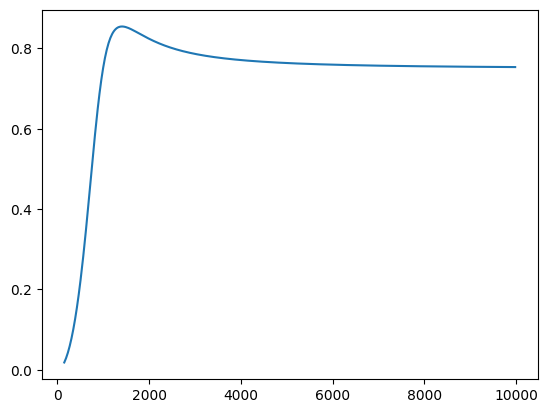

In [28]:
# vout = G vin
import numpy as np
Ls = 2e-3

Rg = 10
Cg = 10e-6

Rl = 30

fstart = 150
fstop = 10000
n_points = 500
flist = np.arange(fstart,fstop, (fstop-fstart)/n_points )
Glist = []
xlist=[]
for f in flist:
    w=2*3.14159*f

    xls = 1j*w*Ls
    xcg = -1j/(w*Cg)
    zload = 1/(1/xls+1/Rl)
    G = zload/(Rg+xcg+zload)
    Glist.append(abs(G))
    xlist.append(G.imag)

plt.plot(flist, Glist)
# plt.loglog(flist, xlist)
# ylim = [-100,2000]
# plt.ylim(ylim)
# plt.plot([f, f], ylim)
# plt.plot([2*f, 2*f], ylim)

plt.show()


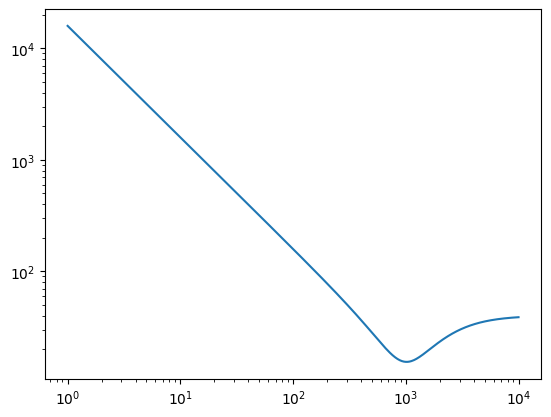

In [29]:
 

fstart = 1
fstop = 10000
n_points = 500
flist = np.arange(fstart,fstop, (fstop-fstart)/n_points )

zlist=[]
xlist=[]
for f in flist:
    w=2*3.14159*f

    xls = 1j*w*Ls
    xcg = -1j/(w*Cg)
    zload = 1/(1/xls+1/Rl)
    ztotal = (Rg+xcg+zload)
    zlist.append(abs(ztotal))
    xlist.append(ztotal.imag)
plt.loglog(flist, zlist)
 
plt.show()

## microwave choke

In [30]:
def minimum(x,y):
    index = np.argmin(y)
    return (x[index],y[index])

c:\Users\levis\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\levis\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


-3db at 1049.5Hz
minimum z: 21.196 at 769.6 Hz
      x = j17.299134195720356


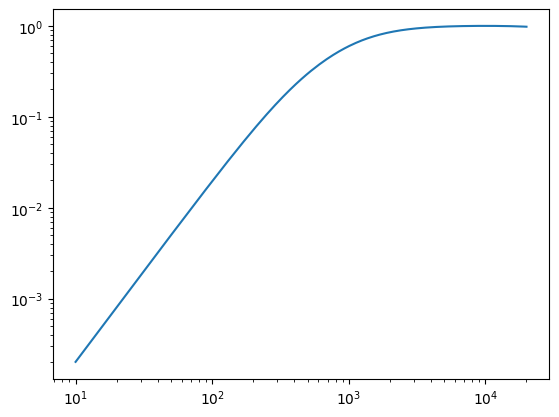

In [31]:
f=30e3
cser = 22e-6
cpar=220e-9
choke = 1.75e-3

r_series = 10

fstart = 10
fstop = 20000
n_points = 500
flist = np.arange(fstart,fstop, (fstop-fstart)/n_points )

zlist=[]
xlist=[]
xlistl=[]
gain = []
for f in flist:
    w=2*3.14159*f
    zcser = 1j/(w*cser)

    zload = ll(-1j/(w*cpar),30,1j*w*choke)
    ztotal = (r_series+zcser+zload)
    zlist.append(abs(ztotal))
    xlist.append(ztotal.imag)
    xlistl.append(zload.imag)
    gain.append(zload/ztotal)
gain=np.array(gain)
gain/=np.max(gain)
# plt.loglog(flist, zlist)
plt.loglog(flist, gain)

index = np.abs(np.square(gain)-0.5).argmin()
print(f"-3db at {round(flist[index],1)}Hz")
               

index = np.argmin(zlist);
print(f"minimum z: {round(zlist[index],3)} at {round(flist[index],1) } Hz\n\
      x = j{xlist[index]}")

 
# plt.loglog(flist, gain)
plt.show();



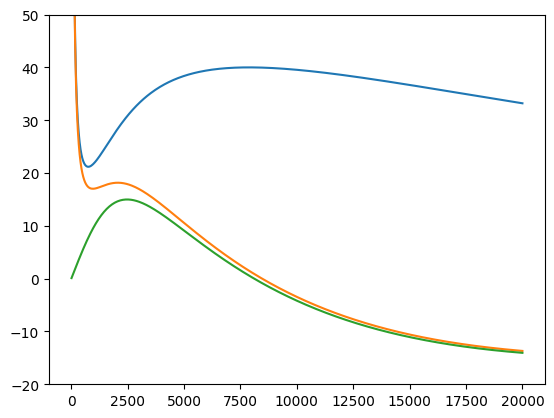

In [32]:
 
plt.plot(flist, zlist)
plt.plot(flist, xlist)
plt.plot(flist, xlistl)
plt.ylim([-20,50])
plt.show()